In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from matplotlib.lines import Line2D

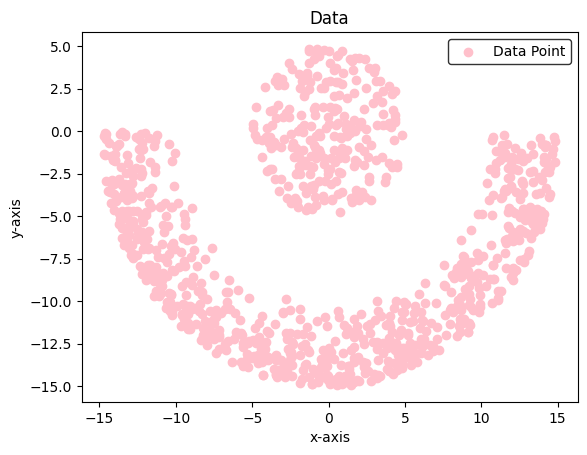

In [2]:
def getData():
    data = pd.read_csv("cm_dataset_2.csv",header=None)
    data = data.to_numpy()
    data = data.transpose()
    return data
data = getData()
plt.figure()
plt.title("Data")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.scatter(data[0],data[1],c="pink",label = "Data Point")
plt.legend()
plt.legend().get_frame().set_edgecolor("black")
plt.show()

In [3]:
def randomInitialization(data,k):
    x = data.shape[1]
    res = []
    for i in range(x):
        res.append(random.randint(1,k))
    res = np.array(res)
    return res

In [4]:
def findMeanOfCluster(data,init,k):
    z = np.zeros((k,2))
    count = np.zeros(k)
    for i in range(data.shape[1]):
        z[init[i]-1] = z[init[i]-1] + data[:,i]
        count[init[i]-1] = count[init[i]-1] + 1
    for i in range(k):
        if count[i]!=0:
            z[i] = z[i]/count[i]
    return z

In [5]:
def error(data,init,z):
    res = 0
    for i in range(data.shape[1]):
        vec = data[:,i]
        vec = np.array(vec)
        err = vec - z[init[i]-1]
        err = np.array(err)
        res = res + np.dot(err,err)
    return res

In [6]:
def reassign(data,init,z,k):
    for i in range(data.shape[1]):
        vec = data[:,i]
        min = 1000
        t=-1
        for j in range(k):
            er = vec - z[j]
            er = np.array(er)
            d = np.dot(er,er)
            d = math.sqrt(d)
            if (d<min):
                min=d
                t = j
        init[i]=t+1
    return init

In [7]:
def kMeans(data,init,k):
    it_err = []
    z = findMeanOfCluster(data,init,k)
    prev_error = error(data,init,z)
    it_err.append(prev_error)
    init = reassign(data,init,z,k)
    new_error = error(data,init,z)
    it_err.append(new_error)
    while(new_error<prev_error):
        prev_error=new_error
        init = reassign(data,init,z,k)
        z = findMeanOfCluster(data,init,k)
        new_error = error(data,init,z)
        it_err.append(new_error)
    it_err = np.array(it_err)
    return init,it_err,z

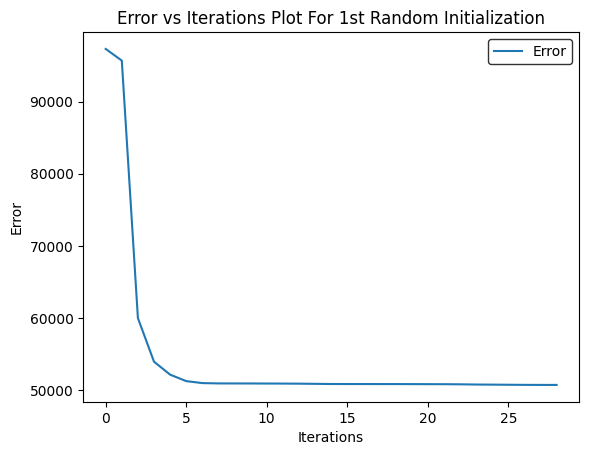

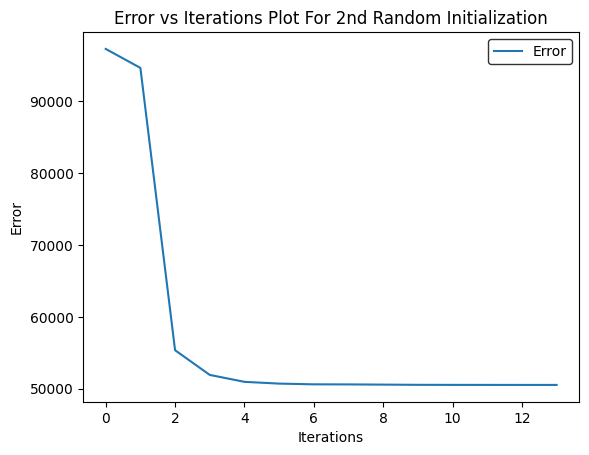

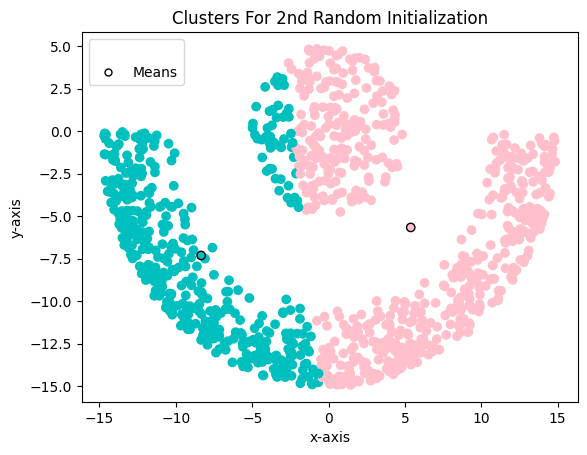

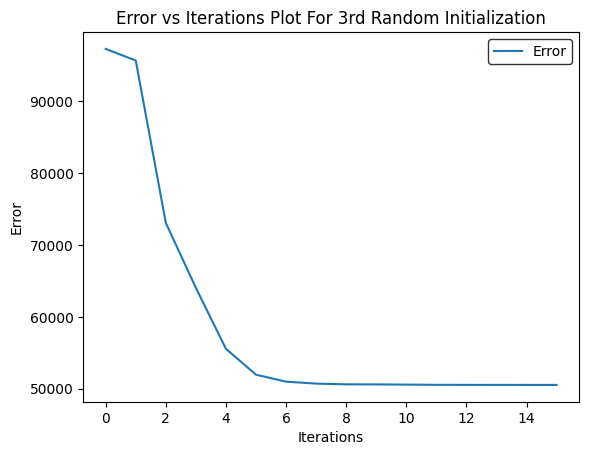

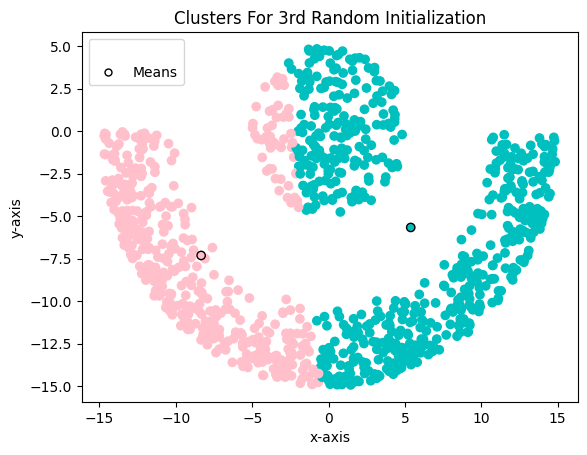

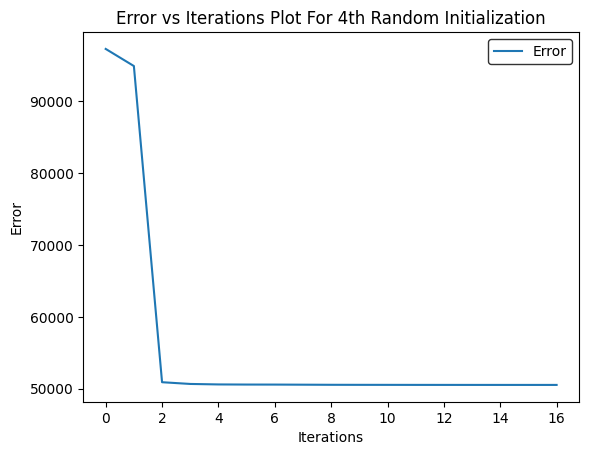

In [8]:
def plotForRandomInit(data,k):
    for i in range(k):
        init = randomInitialization(data,2)
        new_init,it_err_y,z = kMeans(data,init,2)
        it_err_x = []
        for j in range(it_err_y.shape[0]):
            it_err_x.append(j)
        plt.figure()
        k_list = ["1st","2nd","3rd","4th","5th"]
        plt.title("Error vs Iterations Plot For "+k_list[i]+" Random Initialization")
        plt.xlabel("Iterations")
        plt.ylabel("Error")
        plt.plot(it_err_x,it_err_y,label="Error")
        plt.legend()
        plt.legend().get_frame().set_edgecolor("black")
        plt.show()
        c_list=["pink","c","orange","violet","deepskyblue"]
        color_label=[c_list[i-1] for i in new_init]
        plt.figure()
        line1 = Line2D([], [], color="white", marker='o', markerfacecolor="white",markeredgecolor="white",markersize=0)
        line2 = Line2D([], [], color="white", marker='o', markerfacecolor="white",markeredgecolor="black",markersize=5)
        plt.legend((line1, line2), ('', 'Means'), numpoints=1, loc="upper left",fontsize=10)
        plt.title("Clusters For "+k_list[i]+" Random Initialization")
        plt.xlabel("x-axis")
        plt.ylabel("y-axis")
        plt.scatter(data[0],data[1],c=color_label)
        z = np.array(z)
        z = z.transpose()
        mean_color = ["pink","c"]
        plt.scatter(z[0],z[1],c=mean_color,edgecolor="black")
        plt.show()

plotForRandomInit(data,5)

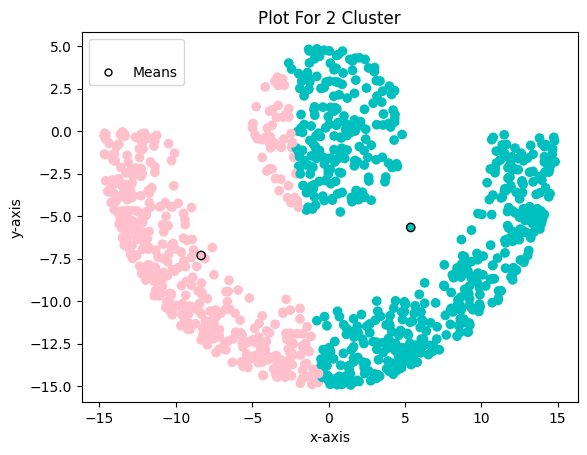

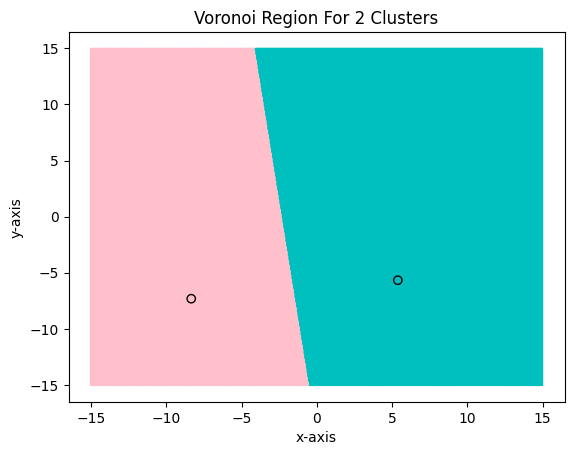

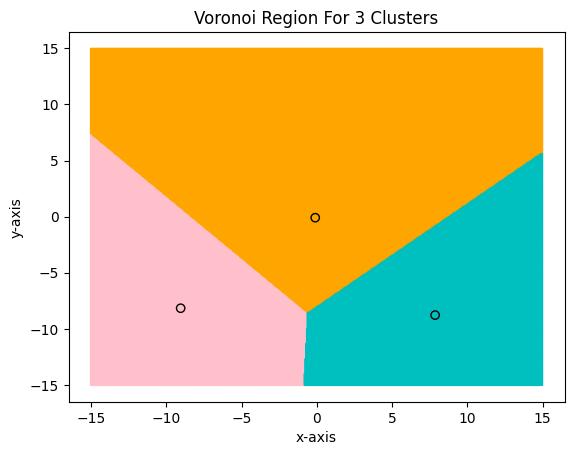

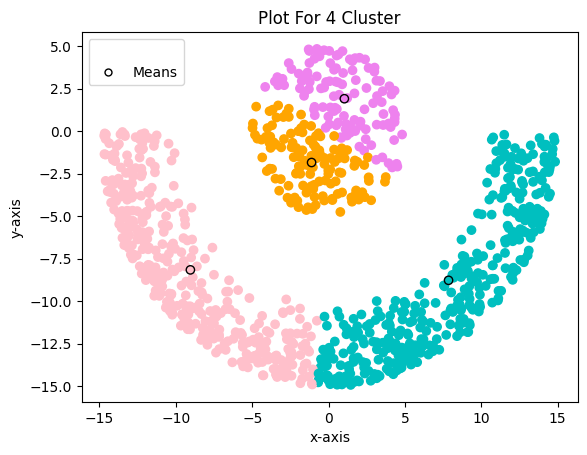

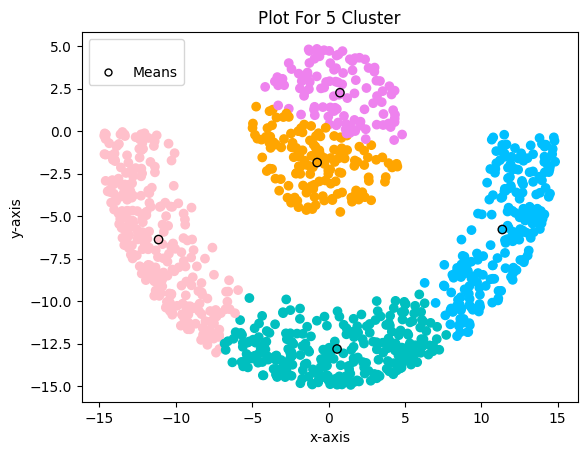

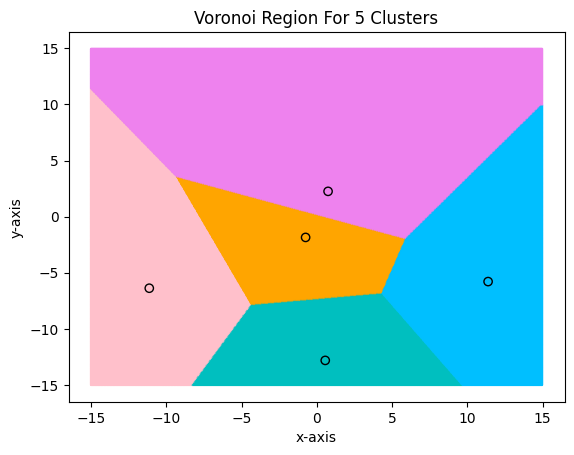

In [9]:
def plotForFixedInit(data):
    k = [2,3,4,5]
    init = randomInitialization(data,2)
    for i in k:
        new_init,it_err_y,z = kMeans(data,init,i)
        it_err_x = []
        for j in range(it_err_y.shape[0]):
            it_err_x.append(j)
        plt.figure()
        plt.title("Plot For "+str(i)+" Cluster")
        plt.xlabel("x-axis")
        plt.ylabel("y-axis")
        c_list=["pink","c","orange","violet","deepskyblue"]
        color_label=[c_list[i-1] for i in new_init]
        plt.scatter(data[0],data[1],c=color_label)
        z = z.transpose()
        plt.scatter(z[0],z[1],c=c_list[0:i],edgecolor="black")
        line1 = Line2D([], [], color="white", marker='o', markerfacecolor="white",markeredgecolor="white",markersize=0)
        line2 = Line2D([], [], color="white", marker='o', markerfacecolor="white",markeredgecolor="black",markersize=5)
        plt.legend((line1, line2), ('', 'Means'), numpoints=1, loc="upper left",fontsize=10)
        plt.show()
        z = z.transpose()
        c_list=["pink","c","orange","violet","deepskyblue"]
        xx = []
        yy = []
        for a in np.arange(-15,15,0.05):
            for b in np.arange(-15,15,0.05):
                xx.append(a)
                yy.append(b)
        plt.figure()
        plt.title("Voronoi Region For "+str(i)+" Clusters")
        plt.xlabel("x-axis")
        plt.ylabel("y-axis")
        c_list=["pink","c","orange","violet","deepskyblue"]
        vor_init = np.zeros(len(xx))
        for l in range(len(xx)):
            min = 1000
            t=-1
            t1 = xx[l]
            t2 = yy[l]
            vec = np.array([t1,t2])
            for x in range(i):
                err = z[x]
                er = vec - z[x]
                er = np.array(er)
                d = np.dot(er,er)
                d = math.sqrt(d)
                if (d<min):
                    min=d
                    t = x
            vor_init[l]=t+1
        color_label=[c_list[int(p-1)] for p in vor_init]
        plt.scatter(xx,yy,c=color_label,s=0.5)
        z = z.transpose()
        plt.scatter(z[0],z[1],c=c_list[0:i],edgecolor="black")
        plt.show()
plotForFixedInit(data)

In [10]:
def centerData(data):
    mean = data.mean(axis=1,keepdims=True)
    data = data - mean
    return data

In [11]:
def eigenDecomposition(data):
    e_val,e_vec = np.linalg.eig(data)
    return e_vec,e_val

In [12]:
def findTopKEigenVec(e_vec,e_val,k):
    idx= e_val.argsort()[::-1]
    total_val = np.sum(e_val)
    w=[] #top k eigen vectors are stored
    v=[] #top k eigen values
    z =[]#percentage variance of vector
    for i in range(k):
        w.append(np.array(e_vec[:,idx[i]]))
        v.append(e_val[i])
        x = (e_val[i]/total_val)*100
        z.append(x)
        w[i]=w[i].reshape(e_vec.shape[1],1)
    w = np.array(w)
    w = w[:,:,0]
    v = np.array(v)
    return w,v,z

In [13]:
def polynomialKernel(data,p):
    K = data.transpose()@data
    K = K+1
    return np.power(K,p)

In [76]:
def RBKernel(data,sig):
    res=np.zeros([data.shape[1],data.shape[1]])
    for i in range(data.shape[1]):
        x1 = data[:,i]
        for j in range(data.shape[1]):
            x2 = data[:,j]
            x = x1-x2
            res[i][j] = -(x.transpose()@x)/(2*(sig**2))
            res[i][j] = np.exp(res[i][j])
    return res

In [66]:
def polyKmeans(data,p):
    K = polynomialKernel(data,p)
    e_vec,e_val = eigenDecomposition(K)
    top_e_vec,top_e_val,var = findTopKEigenVec(e_vec,e_val,2)
    H = []
    for i  in range(2):
        H.append(top_e_vec[i])
    H = np.array(H)
    norm=np.linalg.norm(H, axis=1)
    for i in range(len(H)):
        H[i] = H[i]/norm[i]
    init = randomInitialization(data,2)
    init,it_err,z = kMeans(H,init,2)
    c_list=["pink","c","orange","violet","deepskyblue"]
    color_label=[c_list[i-1] for i in init]
    plt.figure()
    plt.title("Spectral K-Means (Polynomial Kernel)")
    plt.xlabel("x-axis")
    plt.ylabel("y-axis")
    plt.scatter(data[0],data[1],c=color_label)
    z = np.array(z)
    z = z.transpose()
    print(z)
    mean_color = ["pink","c"]
    plt.scatter(z[0],z[1],c=mean_color,edgecolor="black")
    line1 = Line2D([], [], color="white", marker='o', markerfacecolor="white",markeredgecolor="white",markersize=0)
    line2 = Line2D([], [], color="white", marker='o', markerfacecolor="white",markeredgecolor="black",markersize=5)
    plt.legend((line1, line2), ('', 'Means'), numpoints=1, loc="upper left",fontsize=10)
    plt.show()

/tmp/ipykernel_10186/2019864412.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  z[init[i]-1] = z[init[i]-1] + data[:,i]
/tmp/ipykernel_10186/3379191772.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  d = math.sqrt(d)


[[-0.02341665 -0.03562526]
 [-0.01786153  0.03693267]]


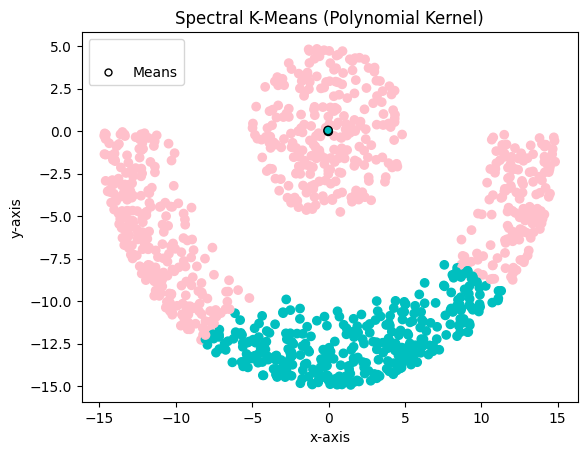

[[ 0.006651    0.04518503]
 [-0.02616618  0.01232958]]


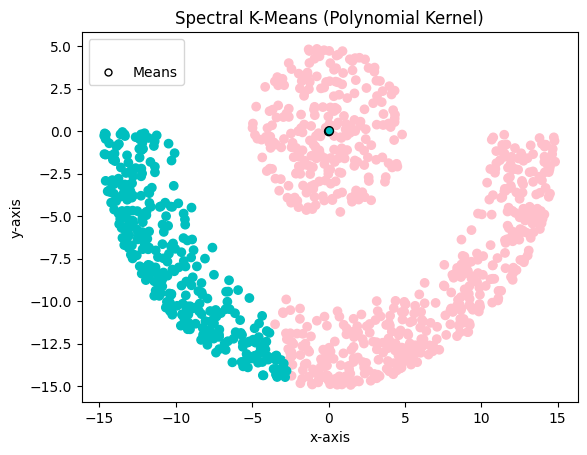

[[-0.02019128 -0.03547722]
 [ 0.01861031 -0.03237223]]


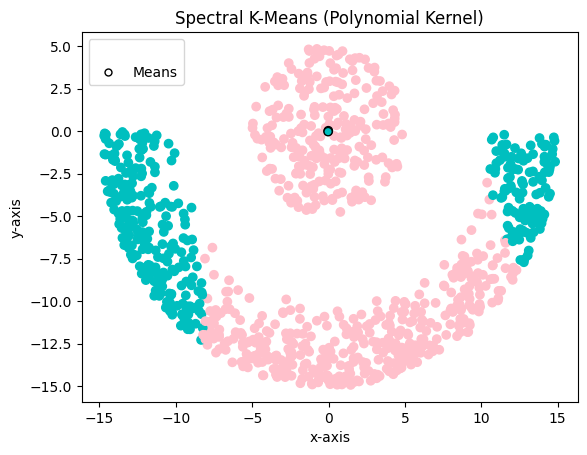

[[ 0.01459052  0.02292053]
 [-0.03921617  0.00992304]]


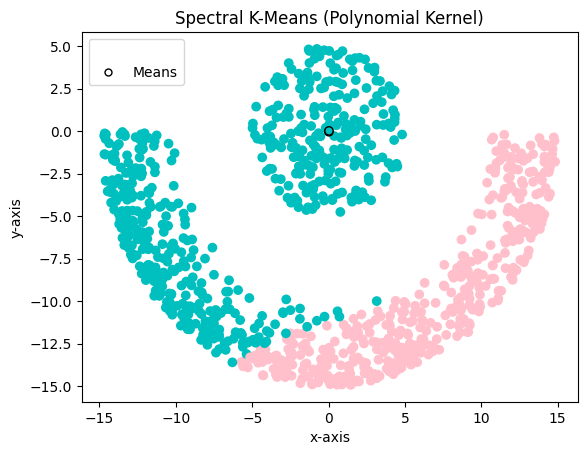

In [67]:
a = [2,3,4,5]
for p in a:
    polyKmeans(data,p)

In [78]:
def rbKmeans(data,p):
    print(data.shape)
    K = RBKernel(data,p)
    e_vec,e_val = eigenDecomposition(K)
    top_e_vec,top_e_val,var = findTopKEigenVec(e_vec,e_val,2)
    H = []
    for i  in range(2):
        H.append(top_e_vec[i])
    H = np.array(H)
    norm=np.linalg.norm(H, axis=1)
    for i in range(len(H)):
        H[i] = H[i]/norm[i]
    init = randomInitialization(data,2)
    init,it_err,z = kMeans(H,init,2)
    c_list=["pink","c","orange","violet","deepskyblue"]
    color_label=[c_list[i-1] for i in init]
    plt.figure()
    plt.title("Spectral K-Means (RBF Kernel)")
    plt.xlabel("x-axis")
    plt.ylabel("y-axis")
    plt.scatter(data[0],data[1],c=color_label)
    z = np.array(z)
    z = z.transpose()
    print(z)
    mean_color = ["pink","c"]
    plt.scatter(z[0],z[1],c=mean_color,edgecolor="black")
    line1 = Line2D([], [], color="white", marker='o', markerfacecolor="white",markeredgecolor="white",markersize=0)
    line2 = Line2D([], [], color="white", marker='o', markerfacecolor="white",markeredgecolor="black",markersize=5)
    plt.legend((line1, line2), ('', 'Means'), numpoints=1, loc="upper left",fontsize=10)
    plt.show()

(2, 1000)
[[0. 1.]
 [1. 0.]]


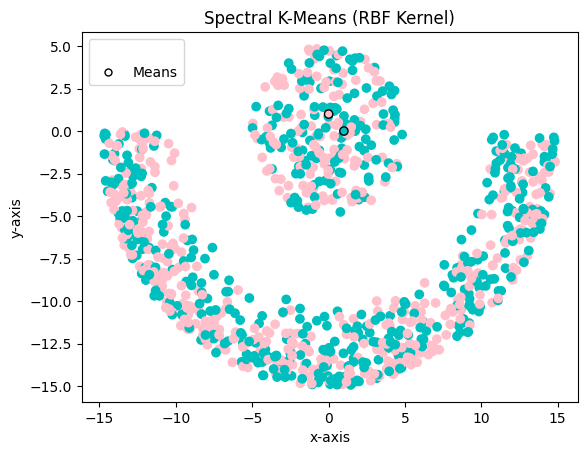

(2, 1000)
[[0. 1.]
 [1. 0.]]


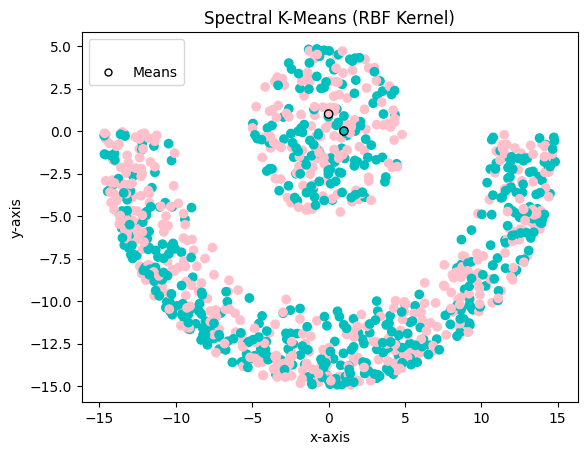

(2, 1000)
[[0. 1.]
 [1. 0.]]


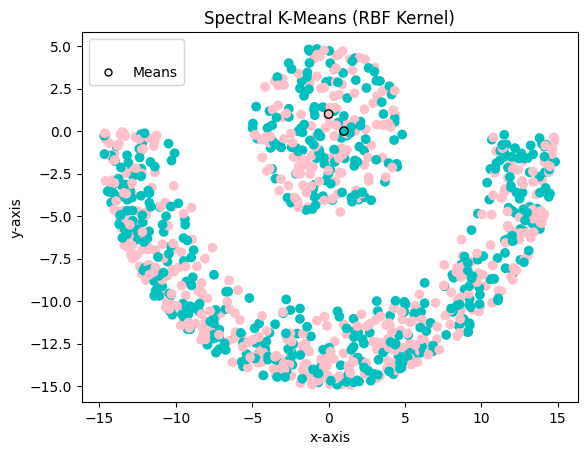

(2, 1000)
[[0.5 0. ]
 [0.5 0. ]]


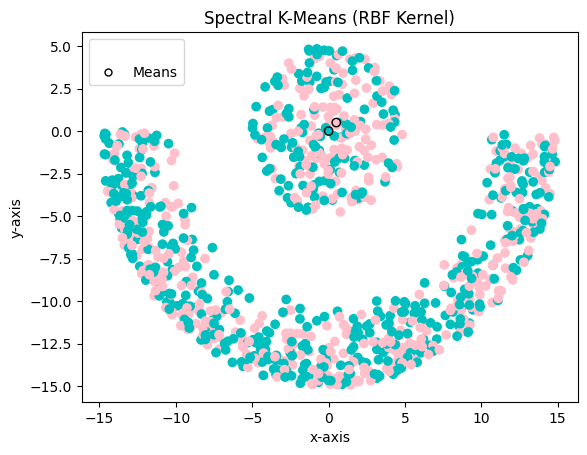

(2, 1000)
[[0. 1.]
 [1. 0.]]


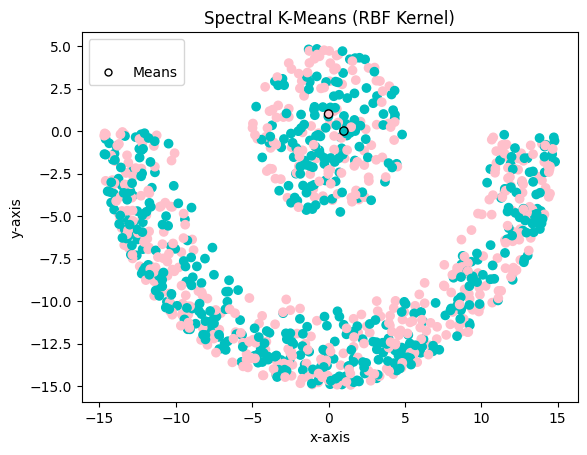

(2, 1000)
[[0.5 0. ]
 [0.5 0. ]]


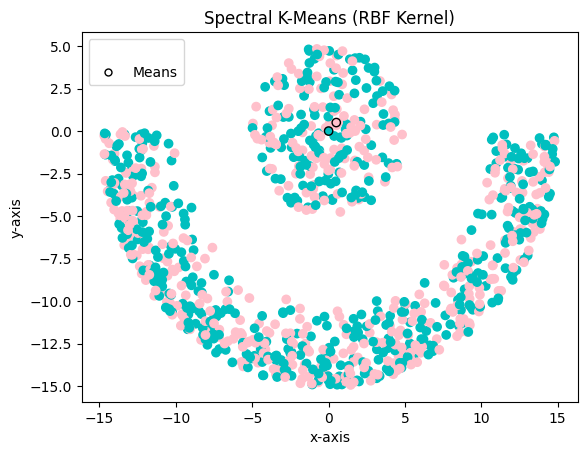

(2, 1000)
[[1. 0.]
 [0. 1.]]


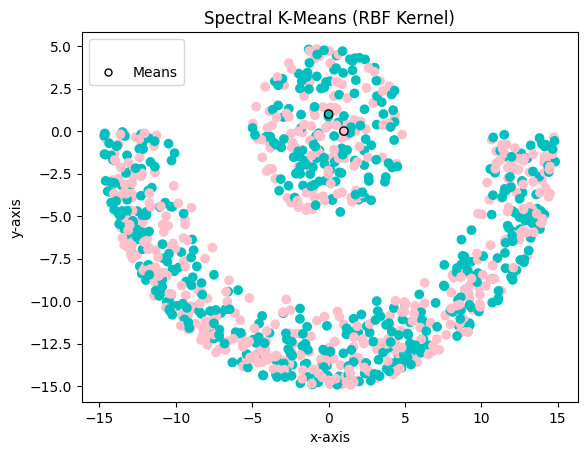

(2, 1000)
[[0. 1.]
 [1. 0.]]


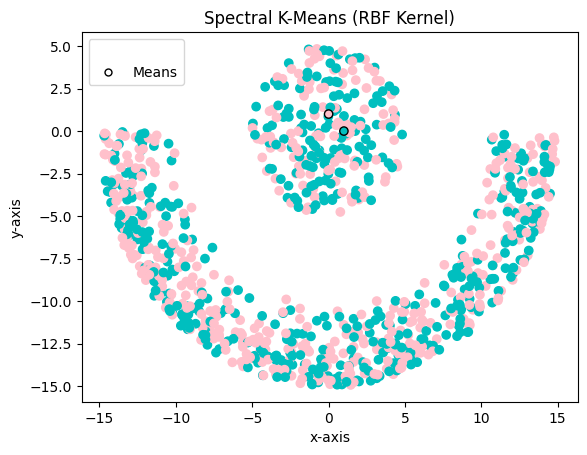

(2, 1000)
[[0. 1.]
 [1. 0.]]


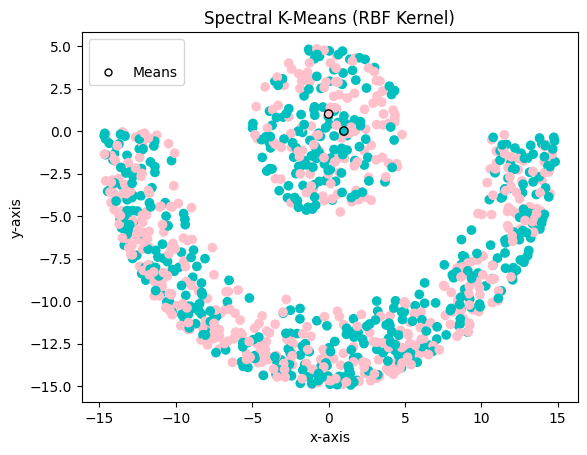

(2, 1000)
[[0. 1.]
 [1. 0.]]


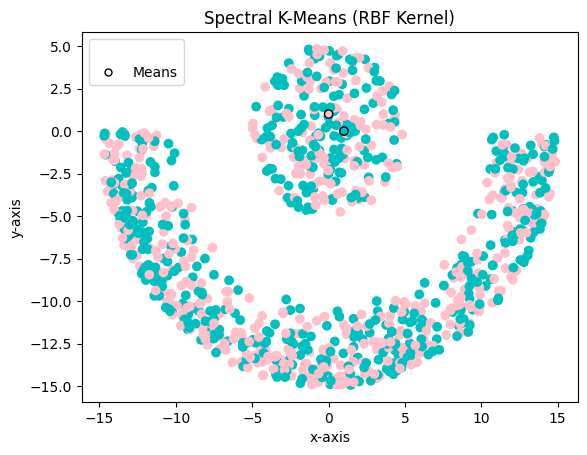

In [79]:
b = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
for p in b:
    rbKmeans(data,p)

In [90]:
def newKMeans(K):
    e_vec,e_val = eigenDecomposition(K)
    top_e_vec,top_e_val,var = findTopKEigenVec(e_vec,e_val,2)
    H = []
    for i  in range(2):
        H.append(top_e_vec[i])
    H = np.array(H)
    init = np.argmax(H,axis=0)
    return init

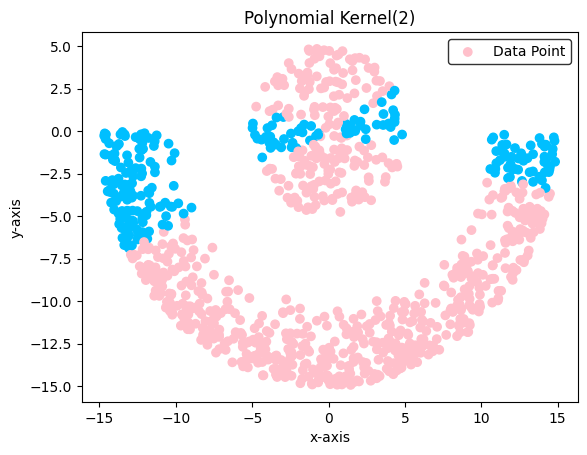

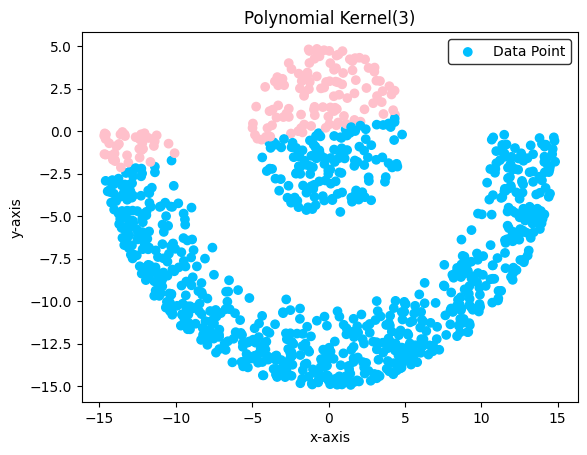

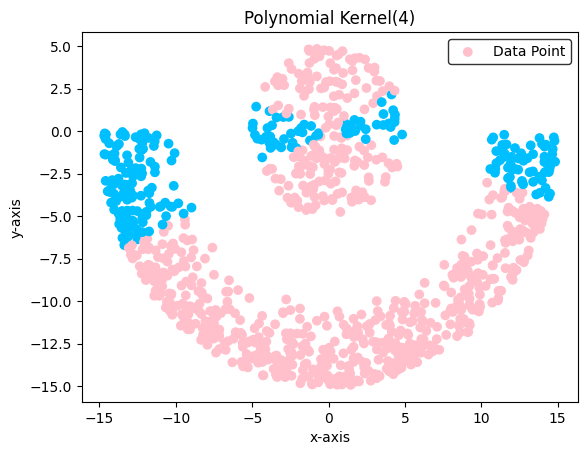

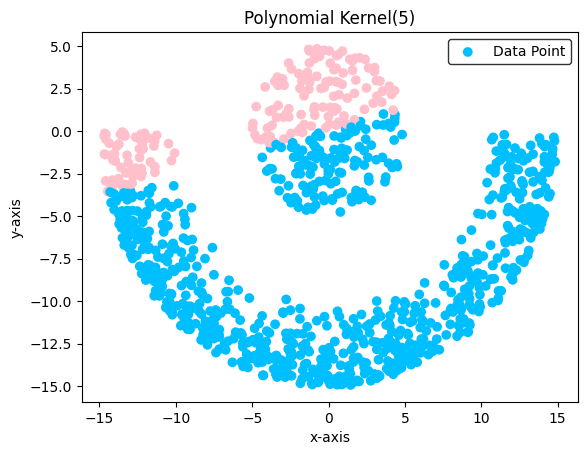

In [100]:
k = [2,3,4,5]

for i in k:
    K = polynomialKernel(data,i)
    init = newKMeans(K)
    c_list=["pink","c","orange","violet","deepskyblue"]
    color_label=[c_list[i-1] for i in init]
    plt.figure()
    plt.title("Polynomial Kernel("+str(i)+")")
    plt.xlabel("x-axis")
    plt.ylabel("y-axis")
    plt.scatter(data[0],data[1],c=color_label,label = "Data Point")
    plt.legend()
    plt.legend().get_frame().set_edgecolor("black")
    plt.show()

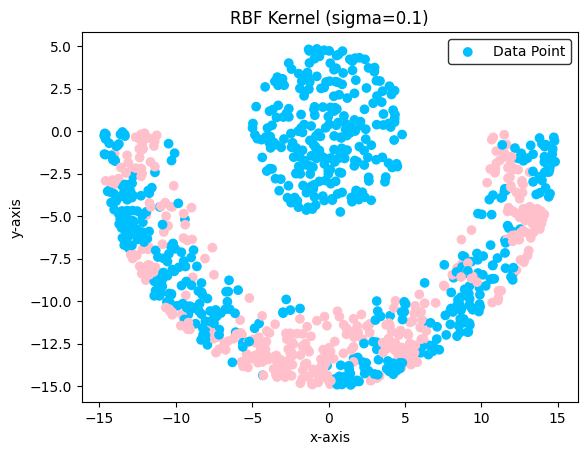

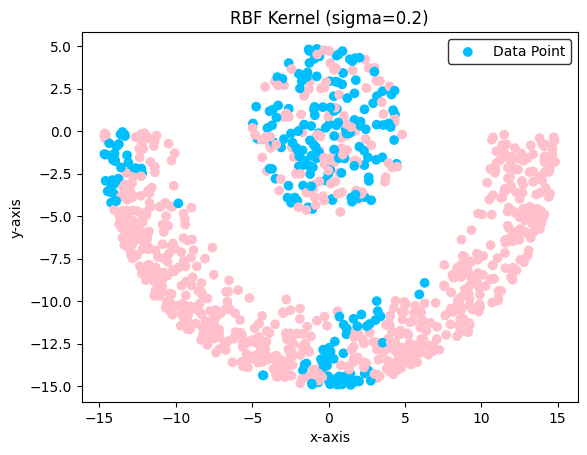

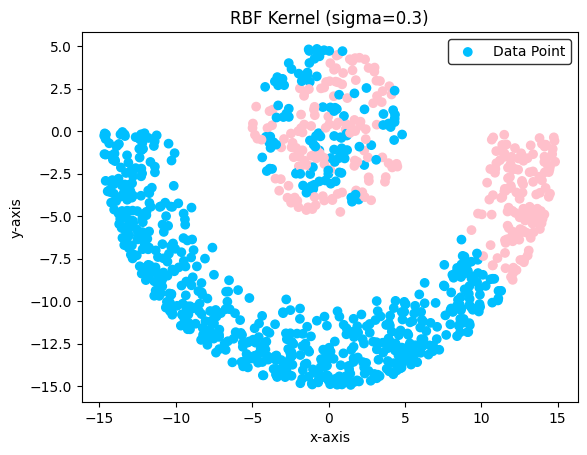

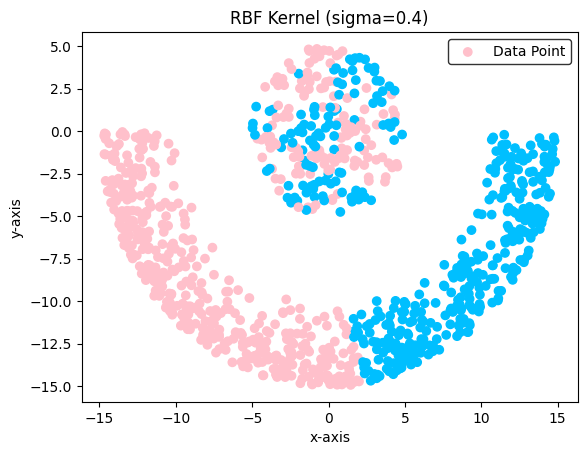

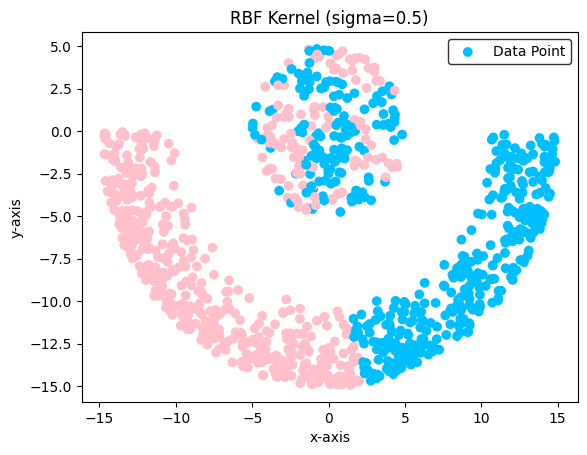

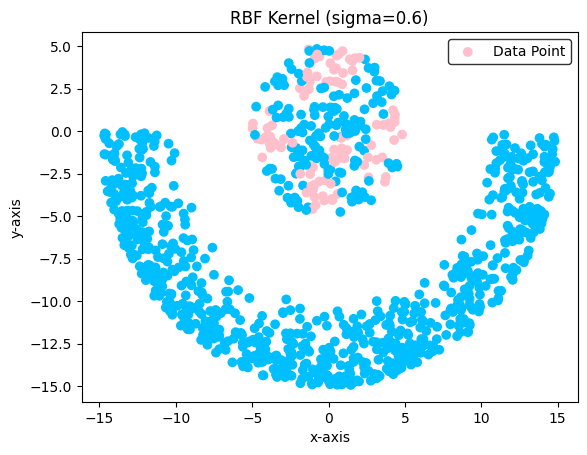

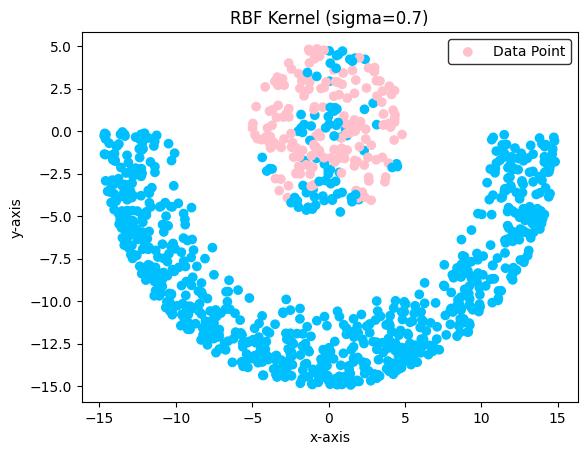

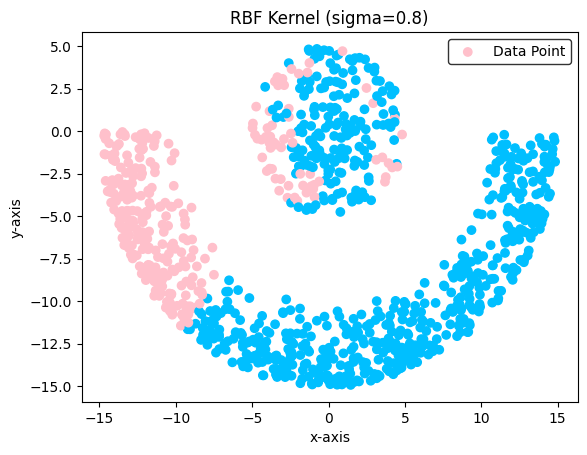

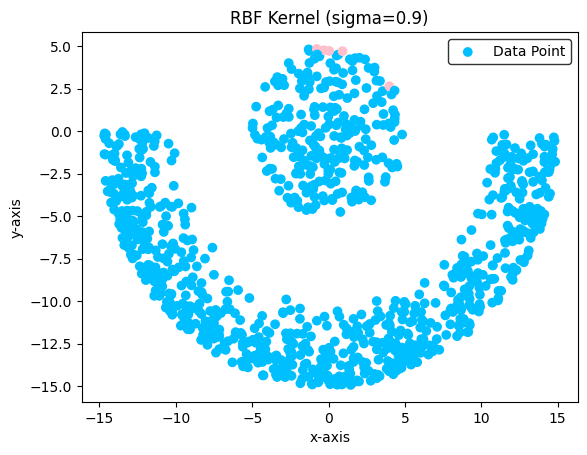

In [97]:
sig = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

for i in sig:
    K = RBKernel(data,i)
    init = newKMeans(K)
    c_list=["pink","c","orange","violet","deepskyblue"]
    color_label=[c_list[i-1] for i in init]
    plt.figure()
    plt.title("RBF Kernel (sigma="+str(i)+")")
    plt.xlabel("x-axis")
    plt.ylabel("y-axis")
    plt.scatter(data[0],data[1],c=color_label,label = "Data Point")
    plt.legend()
    plt.legend().get_frame().set_edgecolor("black")
    plt.show()